In [2]:
#Nicole Zawadzki
#ASTR400b Project
#April 10th
#Plot the density profile for M33
#No more test, this is the real deal

In [3]:
#import modules
import numpy as np
import astropy.units as u

#import plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [4]:
#import relevant files
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassDistribution import MassProfile

In [5]:
#function that find the density of M33 at a radius
def DensityProfile(galaxy, snap, R):
    #input: galaxy name, snapshot, and raduis array 
    #return: array of densities at each r in inupt array
    
    #reconstruct file
    #add string of the filenumber to find value "000"
    ilbl = '000' + str(snap)
    #remove all but the last 3 digits
    ilbl = ilbl[-3:]
    filename = "%s_"%(galaxy) + ilbl + '.txt'

    #read in data from ReadFile
    time, total, data = Read(filename)
    
    #index for disk particles
    ptype = np.where(data['type'] == 2)
    
    #store position and mass from ReadFile for disk particles
    x = data['x'][ptype]
    y = data['y'][ptype]
    z = data['z'][ptype]
    m = data['m'][ptype]*1e10
    
    #create Center of Mass object for disk particles
    COM = CenterOfMass(filename,2)
    COMP = COM.COM_P(1.0,4.0)
    
    #mass profile object
    Profile = MassProfile(galaxy,snap)
    DiskMass = Profile.MassEnclosed(2,R)
    
    #find position relative to COM
    x2 = x - COMP[0]
    y2 = y - COMP[1]
    z2 = z - COMP[2]
    r = np.sqrt(x2**2 + y2**2 + z2**2)
    print len(r)
    print r
    #define density array
    density = np.zeros(shape=len(R))
    
    #loop over radius array to find density at certain radius
    for radius in range(len(R)):
        #finding the volume at radius
        vol = (4.0/3.0)*np.pi*R[radius]**3
        #find and store particle masses within given radius
        index = np.where(r<R[radius])
        #print R[radius]
        print np.shape(index)
        density[radius] = np.sum(m[index])/vol
        
    return density 
      

In [31]:
#find snapshots calculate the density at
#use apocenter and pericenter of M33 orbit around M31
#adapting code from bonus question in homework 6

#read in orbit text file
fM33 = np.genfromtxt('SnapData_M33.txt', dtype=None, names=True)
fM31 = np.genfromtxt('SnapData_M31.txt', dtype=None, names=True)
t = fM33['t']
snap = fM33['snap']

#find separation between M33 and M31
xsep = abs(fM31['x'] - fM33['x'])
ysep = abs(fM31['y'] - fM33['y'])
zsep = abs(fM31['z'] - fM33['z'])
rsep = np.sqrt(xsep**2 + ysep**2 + zsep**2)

#define array to store desired times
time_array = []

#indexing time after 6 Gyr
#ind = np.where(time>6)
#using index for separation array
#rnew = r[ind]
#timenew = time[ind]

#loop over r separation to find apocenters and pericenters
for i in range(len(rsep)):
    #if the middle separation is the greatest, this is the apocenter, and print the time and position
    try: 
        if rsep[i-2]<rsep[i-1] and rsep[i-1]>rsep[i]:
            #print 'position:', rnew[i-1], 'time:', timenew[i-1]
            time_array.append(t[i])
        elif rsep[i-2]>rsep[i-1] and rsep[i-1]<rsep[i]:
            time_array.append(t[i])
        else:
            a=0 #else do nothing
    except: 
        a=0

time_array = np.round_(time_array,4)
print time_array

#finding relationship between snap and time
m = (t[150]-t[5])/(snap[150]-snap[5])
print m

snapshot = time_array/m
print snapshot

[  0.     0.07   1.     2.79   4.36   5.5    6.86   7.57   8.36   9.     9.64
  10.14  10.64  11.14]
0.014275862069
[   0.            4.90338164   70.04830918  195.43478261  305.41062802
  385.26570048  480.53140097  530.26570048  585.60386473  630.43478261
  675.26570048  710.28985507  745.31400966  780.33816425]


In [33]:
#finding the snapshots I need to plot the density profiles at the apo/pericenters
shot = np.zeros(shape=len(time_array))
for i in range(len(time_array)):
    ind = np.where(t==time_array[i])
    shot[i] = snap[ind]

print shot    

[   0.    5.   70.  195.  305.  385.  480.  530.  585.  630.  675.  710.
  745.  780.]


In [34]:
R = np.logspace(-1,1.477,50)

M33density1 = DensityProfile('M33', 0, R)
M33density2 = DensityProfile('M33', 5, R)
M33density3 = DensityProfile('M33', 70, R)
M33density4 = DensityProfile('M33', 195, R)
M33density5 = DensityProfile('M33', 305, R)
M33density6 = DensityProfile('M33', 385, R)
M33density7 = DensityProfile('M33', 480, R)
M33density8 = DensityProfile('M33', 530, R)
M33density9 = DensityProfile('M33', 585, R)
M33density10 = DensityProfile('M33', 630, R)
M33density11 = DensityProfile('M33', 675, R)
M33density12 = DensityProfile('M33', 710, R)
M33density13 = DensityProfile('M33', 745, R)
M33density14 = DensityProfile('M33', 780, R)

9300
[ 8.04592256  4.14955208  4.87586573 ...,  5.62367888  1.27754675
  3.50317062]
(1, 89)
(1, 110)
(1, 149)
(1, 209)
(1, 278)
(1, 373)
(1, 459)
(1, 571)
(1, 691)
(1, 846)
(1, 1005)
(1, 1184)
(1, 1368)
(1, 1546)
(1, 1733)
(1, 1954)
(1, 2176)
(1, 2419)
(1, 2658)
(1, 2875)
(1, 3125)
(1, 3388)
(1, 3630)
(1, 3937)
(1, 4204)
(1, 4445)
(1, 4675)
(1, 4904)
(1, 5135)
(1, 5424)
(1, 5751)
(1, 6091)
(1, 6465)
(1, 6838)
(1, 7286)
(1, 7791)
(1, 8222)
(1, 8557)
(1, 8877)
(1, 9071)
(1, 9197)
(1, 9254)
(1, 9278)
(1, 9295)
(1, 9300)
(1, 9300)
(1, 9300)
(1, 9300)
(1, 9300)
(1, 9300)
9300
[ 0.36401364  8.59233863  0.65214144 ...,  4.87140886  2.8368667
  1.12428307]
(1, 53)
(1, 72)
(1, 97)
(1, 130)
(1, 175)
(1, 241)
(1, 335)
(1, 432)
(1, 551)
(1, 704)
(1, 873)
(1, 1081)
(1, 1294)
(1, 1498)
(1, 1727)
(1, 1935)
(1, 2171)
(1, 2392)
(1, 2646)
(1, 2912)
(1, 3160)
(1, 3417)
(1, 3661)
(1, 3905)
(1, 4154)
(1, 4390)
(1, 4632)
(1, 4860)
(1, 5168)
(1, 5465)
(1, 5777)
(1, 6105)
(1, 6440)
(1, 6797)
(1, 7153)
(1, 75

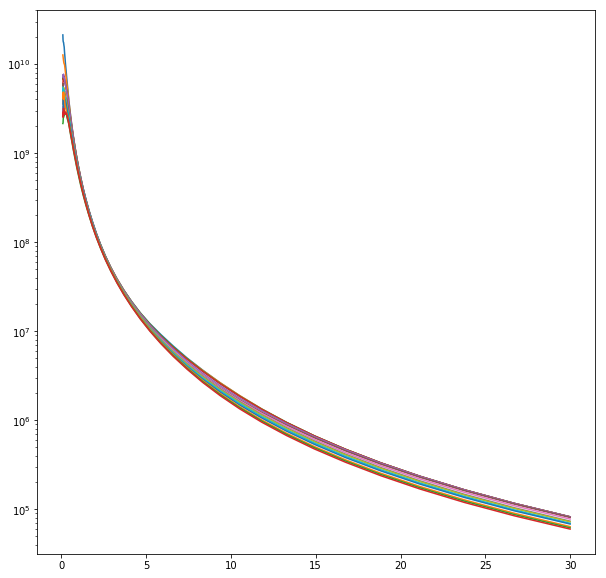

In [37]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
plt.semilogy(R,M33density1)
plt.semilogy(R,M33density2)
plt.semilogy(R,M33density3)
plt.semilogy(R,M33density4)
plt.semilogy(R,M33density5)
plt.semilogy(R,M33density6)
plt.semilogy(R,M33density7)
plt.semilogy(R,M33density8)
plt.semilogy(R,M33density9)
plt.semilogy(R,M33density10)
plt.semilogy(R,M33density11)
plt.semilogy(R,M33density12)
plt.semilogy(R,M33density13)
plt.semilogy(R,M33density14)